In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import glob
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as st
import statsmodels.tsa.api as tsa
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("/content/drive/MyDrive/projects/Store_Sales-Time_Series_Forecasting/")
csv_list = glob.glob('store-sales-time-series-forecasting/*.csv')

for _csv in csv_list:
  df = pd.read_csv(_csv, index_col=0)
  print(_csv)
  print(df.isnull().sum().sum())

store-sales-time-series-forecasting/oil.csv
43
store-sales-time-series-forecasting/test.csv
0
store-sales-time-series-forecasting/holidays_events.csv
0
store-sales-time-series-forecasting/sample_submission.csv
0
store-sales-time-series-forecasting/stores.csv
0
store-sales-time-series-forecasting/train.csv
0
store-sales-time-series-forecasting/transactions.csv
0


In [3]:
df_train = pd.read_csv("store-sales-time-series-forecasting/train.csv", index_col=1, parse_dates=True)
print(df_train.columns)

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')


In [4]:
df_train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [5]:
df_train["family"].unique(), df_train["family"].nunique()

(array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
        'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
        'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
        'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
        'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
        'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
        'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
        'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
        'SEAFOOD'], dtype=object), 33)

In [6]:
c = df_train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family","store_nbr"]).query(" sales==0 ")
print(len(c))
c

53


store_nbr           family  sales
1             1        BABY CARE    0.0
397          13        BABY CARE    0.0
727          23        BABY CARE    0.0
1420         44        BABY CARE    0.0
1453         45        BABY CARE    0.0
1486         46        BABY CARE    0.0
1519         47        BABY CARE    0.0
1552         48        BABY CARE    0.0
1585         49        BABY CARE    0.0
1618         50        BABY CARE    0.0
1651         51        BABY CARE    0.0
1684         52        BABY CARE    0.0
268           9            BOOKS    0.0
301          10            BOOKS    0.0
334          11            BOOKS    0.0
367          12            BOOKS    0.0
400          13            BOOKS    0.0
433          14            BOOKS    0.0
466          15            BOOKS    0.0
499          16            BOOKS    0.0
532          17            BOOKS    0.0
565          18            BOOKS    0.0
598          19            BOOKS    0.0
631          20            BOOKS    0.0
664          21            BOOKS    0.0
697          22            BOOKS    0.0
895          28            BOOKS    0.0
928          29            BOOKS    0.0
961          30            BOOKS    0.0
994          31            BOOKS    0.0
1027         32            BOOKS    0.0
1060         33            BOOKS    0.0
1093         34            BOOKS    0.0
1126         35            BOOKS    0.0
1159         36            BOOKS    0.0
1258         39            BOOKS    0.0
1291         40            BOOKS    0.0
1390         43            BOOKS    0.0
1687         52            BOOKS    0.0
1753         54            BOOKS    0.0
514          16       LADIESWEAR    0.0
811          25       LADIESWEAR    0.0
910          28       LADIESWEAR    0.0
943          29       LADIESWEAR    0.0
1042         32       LADIESWEAR    0.0
1075         33       LADIESWEAR    0.0
1141         35       LADIESWEAR    0.0
1306         40       LADIESWEAR    0.0
1405         43       LADIESWEAR    0.0
1768         54       LADIESWEAR    0.0
449          14  LAWN AND GARDEN    0.0
977          30  LAWN AND GARDEN    0.0
1769         54  LAWN AND GARDEN    0.0

In [7]:
family_list = np.sort(df_train["family"].unique())
nbr_list = np.sort(df_train["store_nbr"].unique())

In [ ]:
for family in family_list:
  for nbr in nbr_list:
    target_values = df_train.query(" (family==@family) & (store_nbr==@nbr) ").asfreq("D").interpolate().sales.to_numpy()
    adf_rt = tsa.adfuller(target_values)
    att = ''
    if adf_rt[1] > 0.05:
      att = "＊＊＊Attention！＊＊＊"
    print(f"{att}family：{family}, nbr : {nbr}")
    print(f"ADF statistic：{adf_rt[0]}, P-value：{adf_rt[1]}")

In [ ]:
for family in family_list:
  a = df_train.query(" family==@family ")[["store_nbr", "sales"]]
  a["ind"] = 1
  a["ind"] = a.groupby("store_nbr").ind.cumsum().values
  a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
  mask = np.triu(a.corr())
  plt.figure(figsize=(20, 20), dpi=180)
  sns.heatmap(a,
          annot=True,
          fmt='.1f',
          cmap='coolwarm',
          square=True,
          mask=mask,
          linewidths=1,
          cbar=False)
  plt.title(f"{family} Correlations", fontsize = 20)
  plt.show()
plt.close()

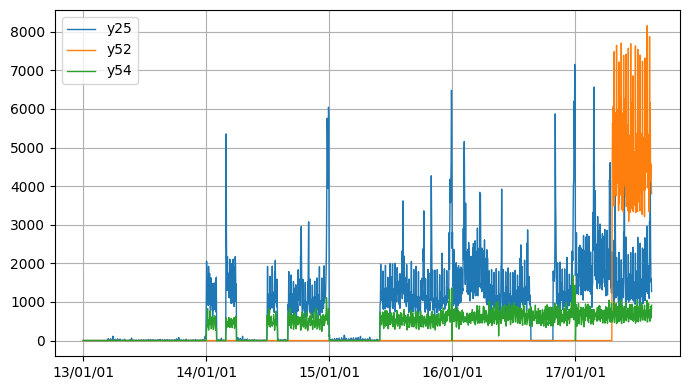

In [ ]:
fig = plt.figure(figsize=(7, 4), dpi=100)
data = df_train.query(" family=='PRODUCE' ")
x = data.query(" store_nbr==52 ").index
y25 = data.query(" store_nbr==25 ").sales.to_numpy()
y52 = data.query(" store_nbr==52 ").sales.to_numpy()
y54 = data.query(" store_nbr==54 ").sales.to_numpy()
ax = fig.add_subplot(111)
ax.plot(x, y25, linewidth=1.0, label="y25")
ax.plot(x, y52, linewidth=1.0, label="y52")
ax.plot(x, y54, linewidth=1.0, label="y54")
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
fig.tight_layout()
plt.grid()
plt.legend()
plt.show()
plt.close()

In [ ]:
# 各日にちのfamilyごとの売り上げ()
df_train_g = df_train.groupby(["date", "family"]).sum()
px.line(df_train_g, x=df_train_g.index.get_level_values("date"), y="sales", color=df_train_g.index.get_level_values("family"), title="sales" )

In [ ]:
family = "BEVERAGES"
df_train_g = df_train.query(" family==@family ").groupby(["date", "store_nbr"]).sum()
px.line(df_train_g, x=df_train_g.index.get_level_values("date"), y="sales", color=df_train_g.index.get_level_values("store_nbr"), title="sales" )

In [ ]:
df_stores = pd.read_csv("store-sales-time-series-forecasting/stores.csv")
print(len(df_stores))
df_stores.head()

54


store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [8]:
df_oil = pd.read_csv("store-sales-time-series-forecasting/oil.csv", index_col=0, parse_dates=True)
#df_oil = df_oil.asfreq("D").fillna(0)
df_oil = df_oil.asfreq("D")
df_oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-05         NaN

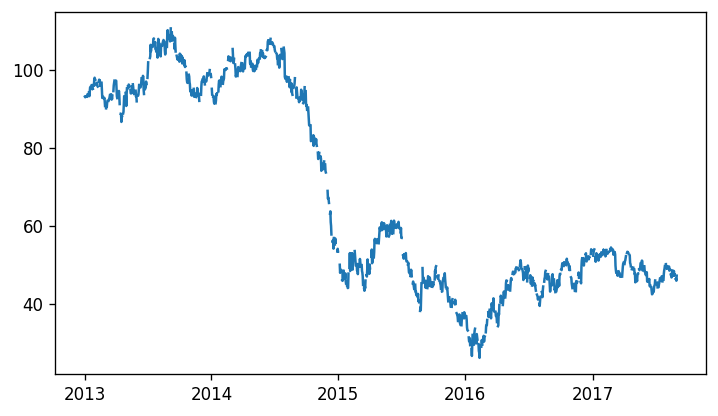

In [22]:
fig = plt.figure(figsize=(7, 4), dpi=120)
ax = fig.add_subplot(111)
x = df_oil.index
y = df_oil["dcoilwtico"].to_numpy()
ax.plot(x, y)
plt.show()
plt.close()

給料日(15日と月末)に売り上げが上がるか

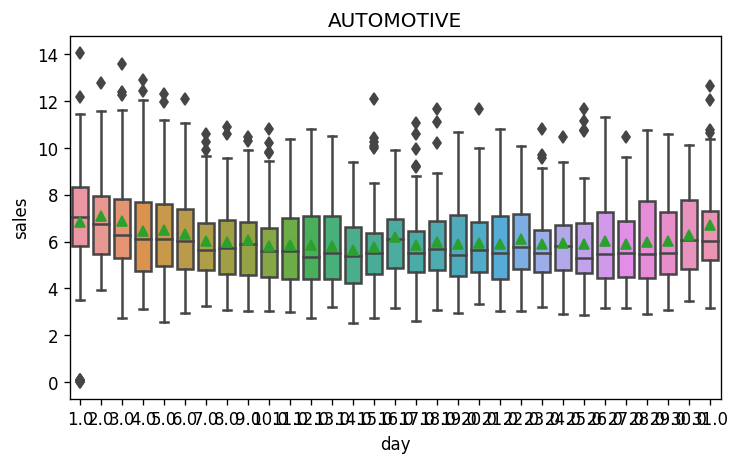

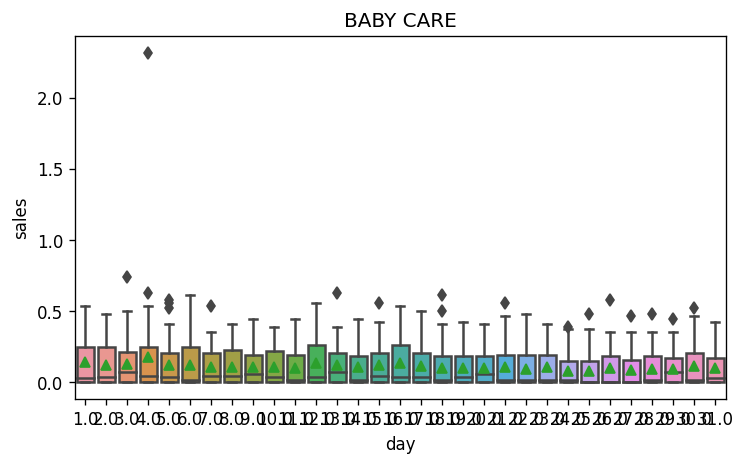

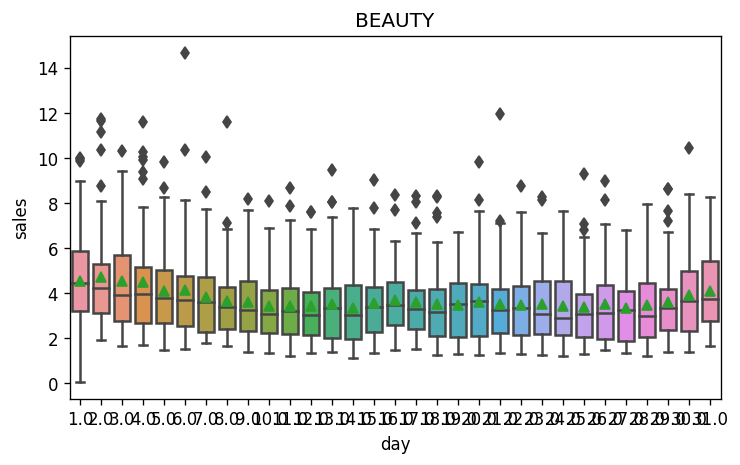

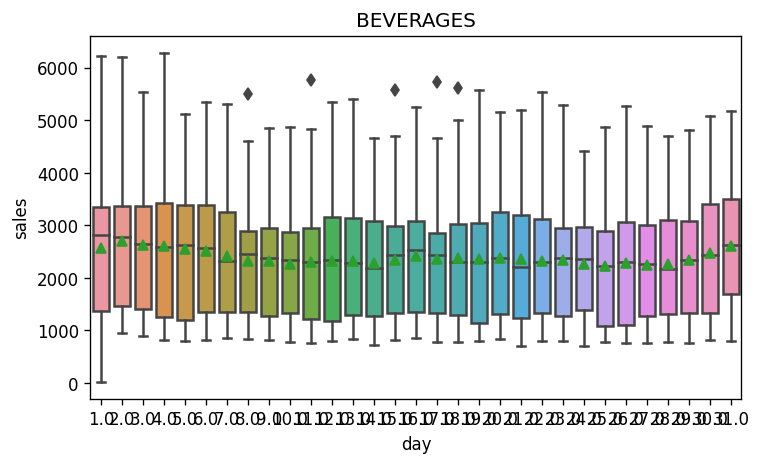

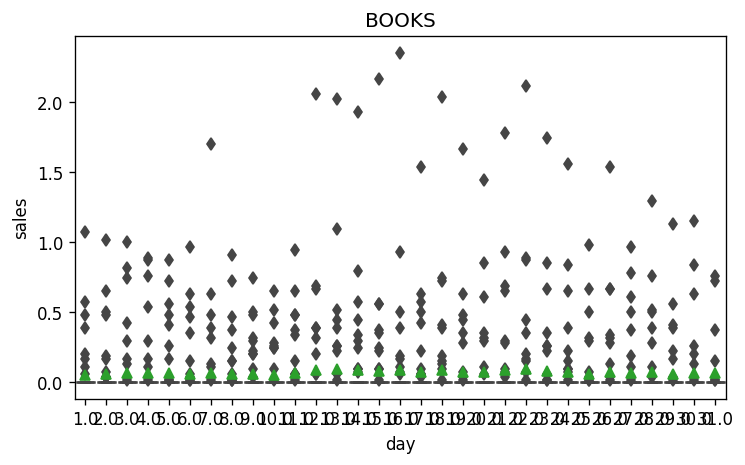

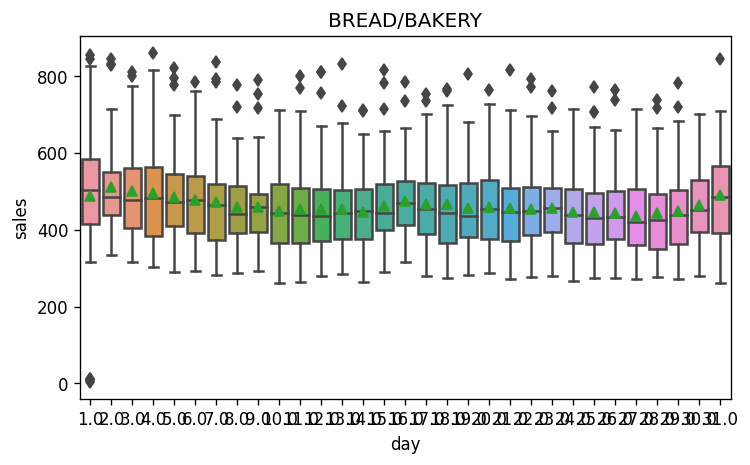

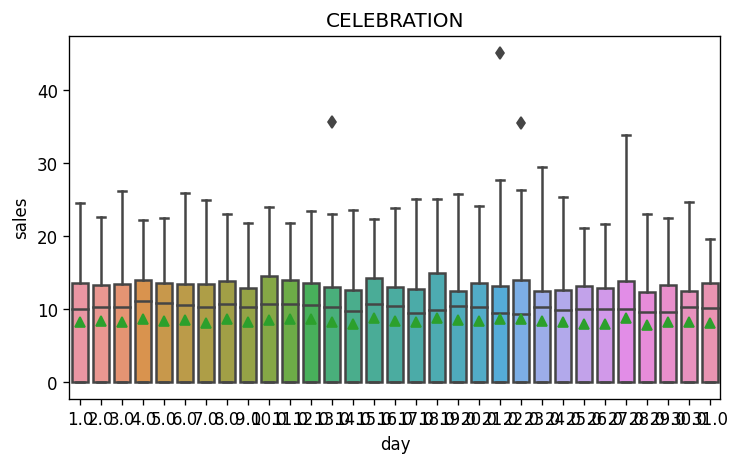

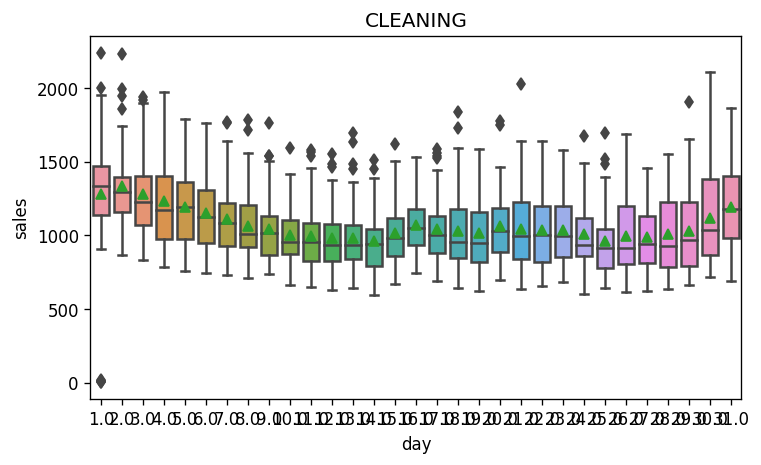

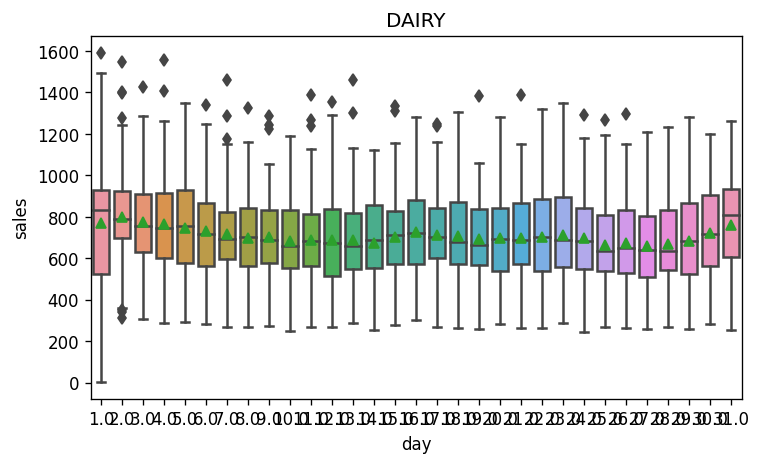

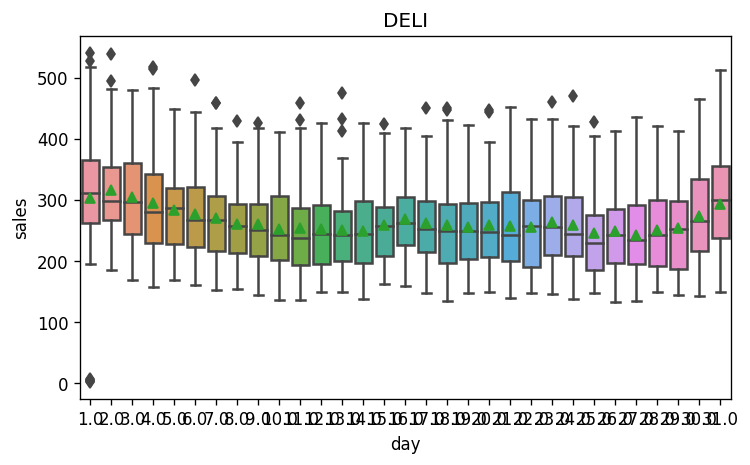

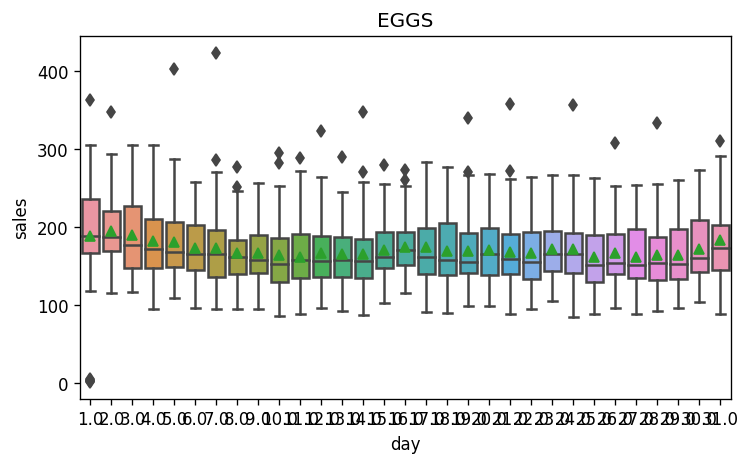

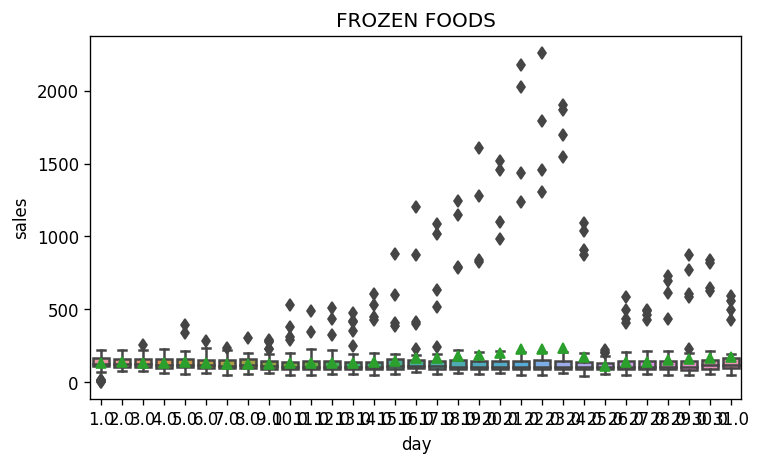

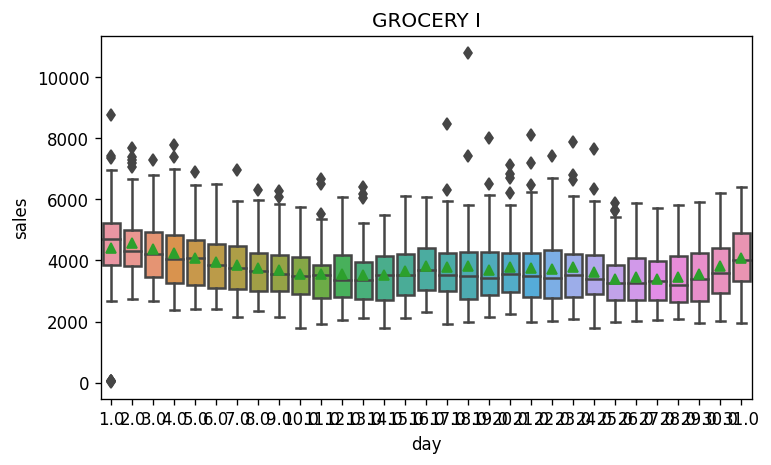

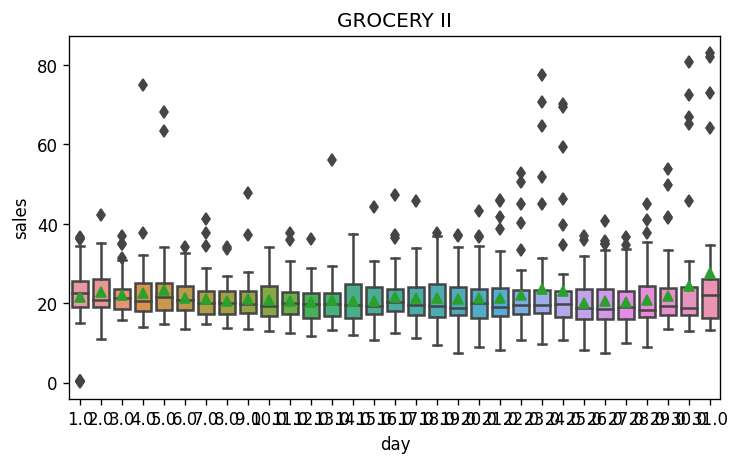

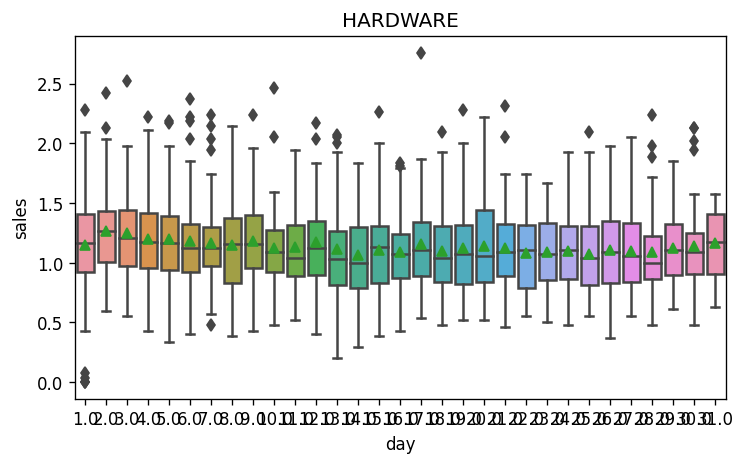

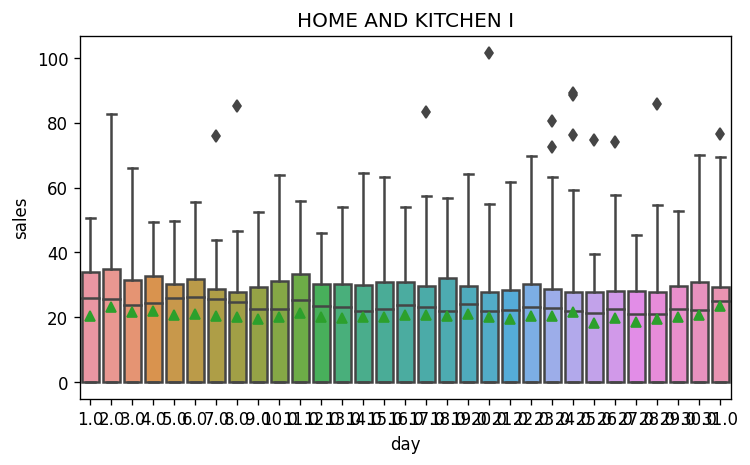

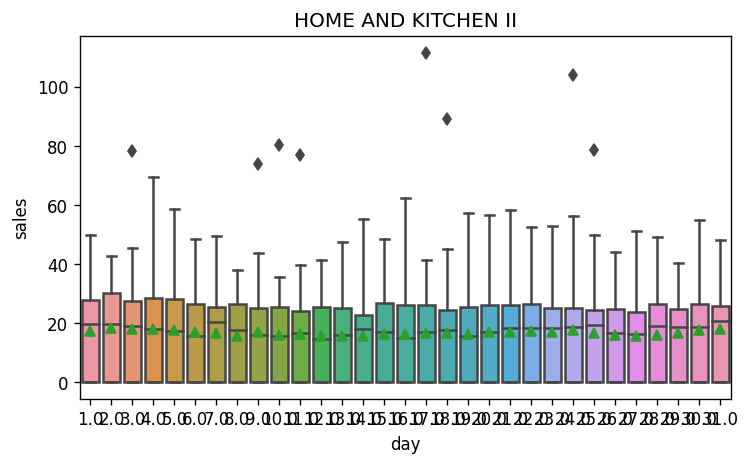

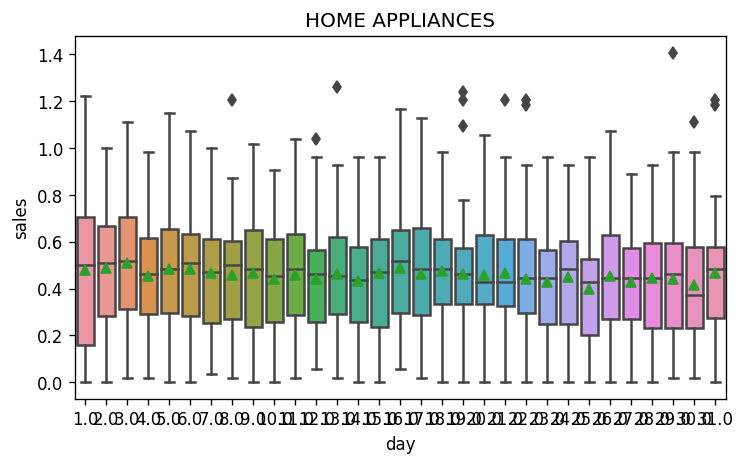

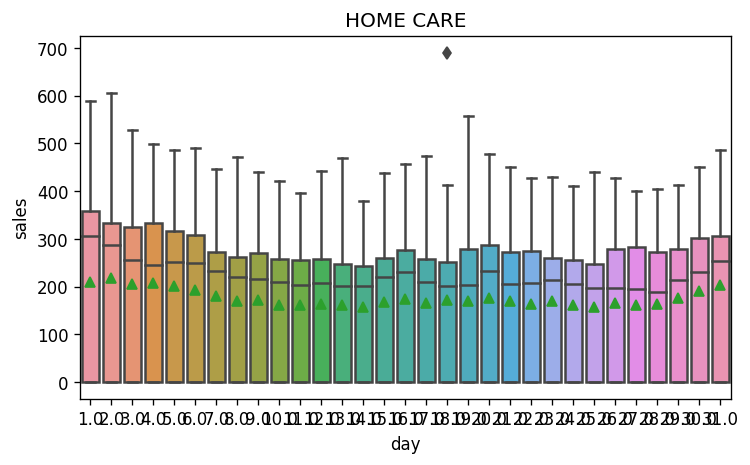

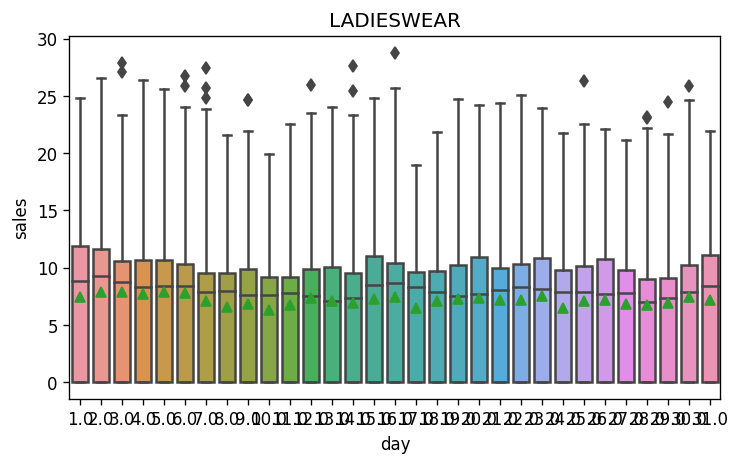

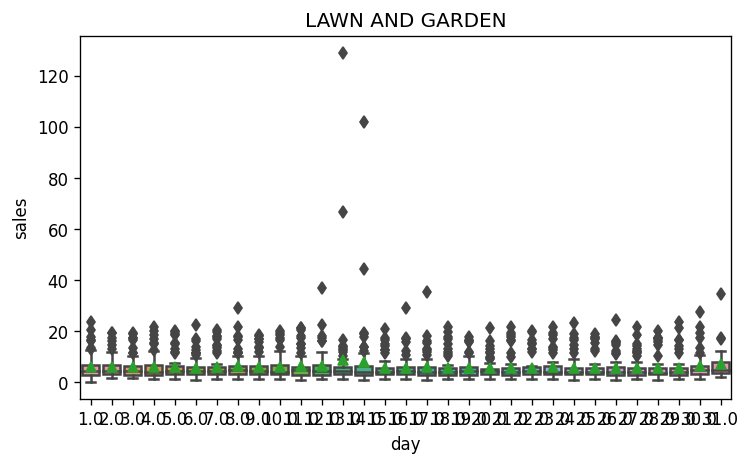

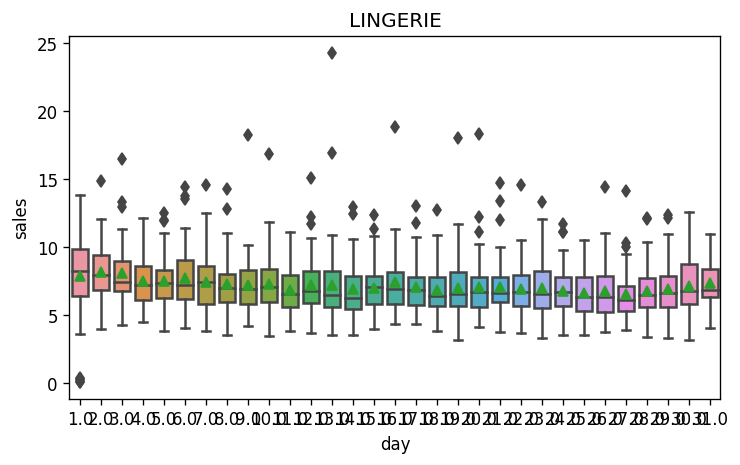

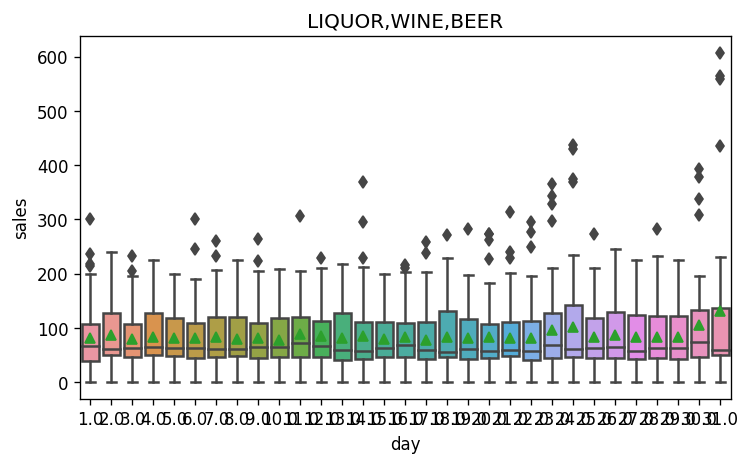

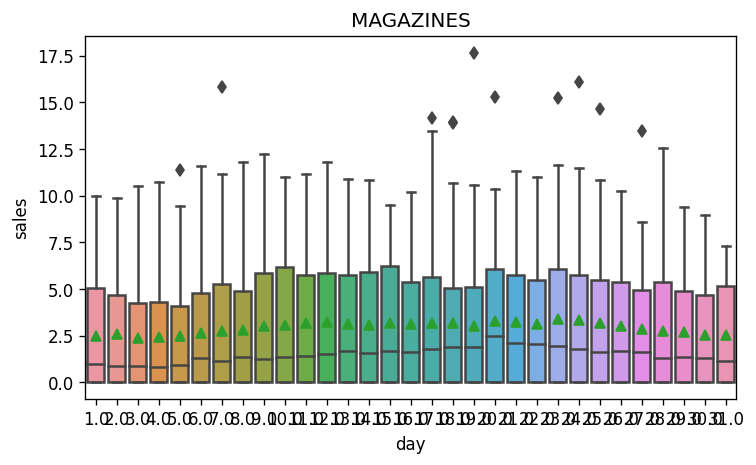

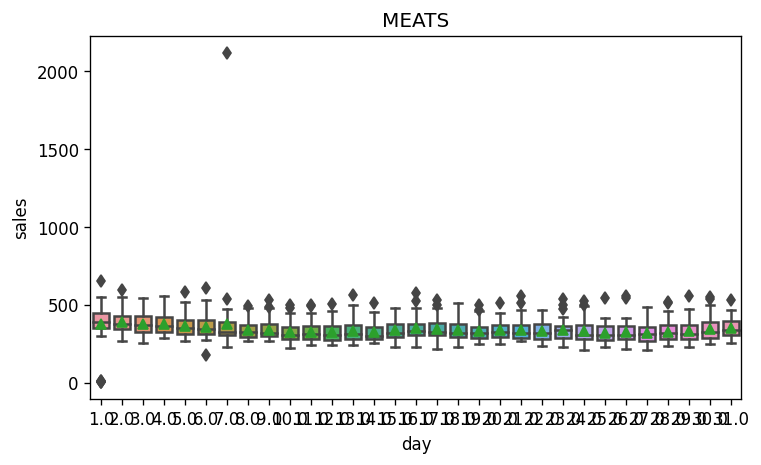

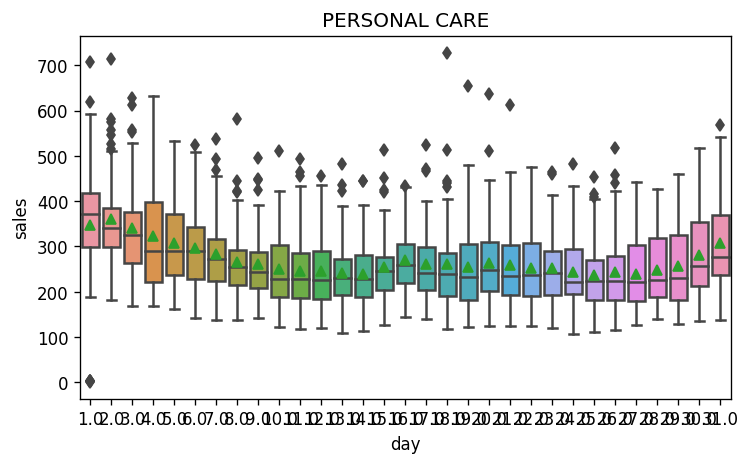

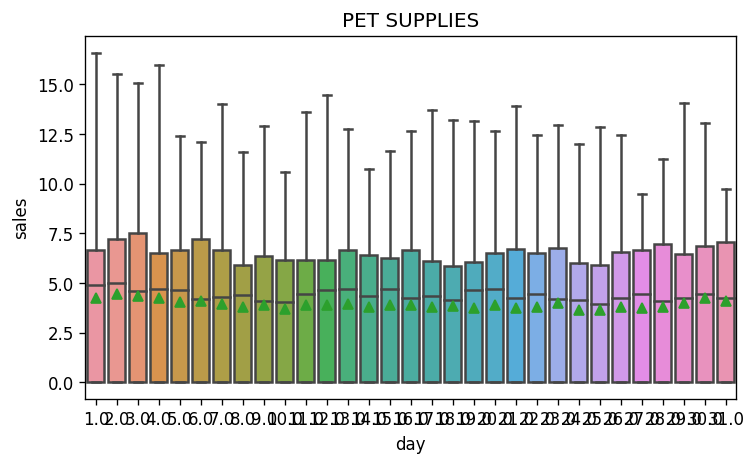

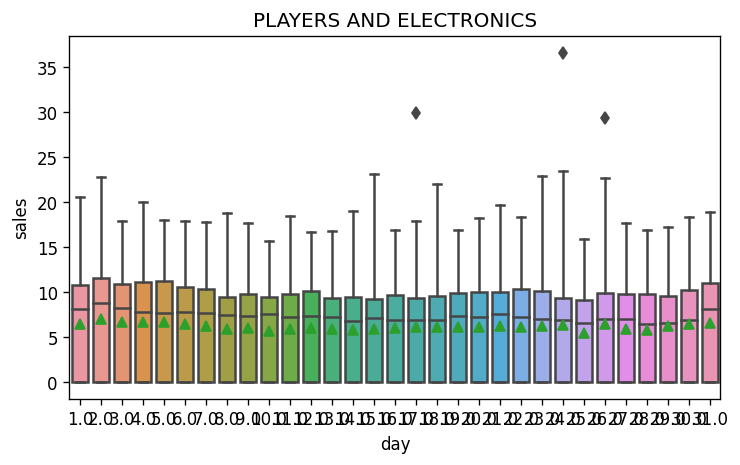

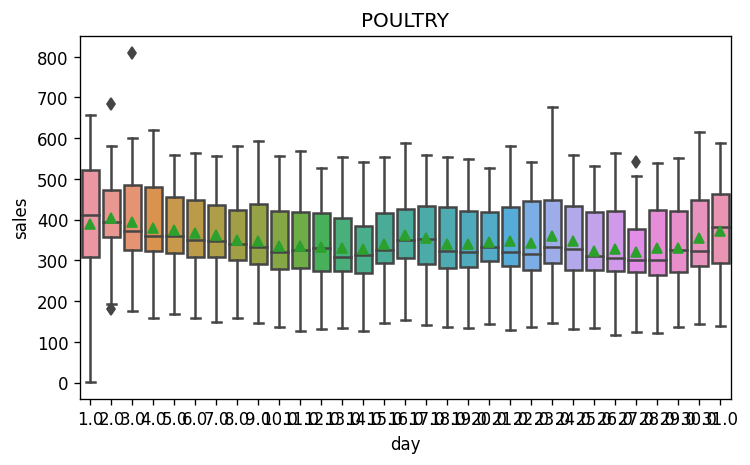

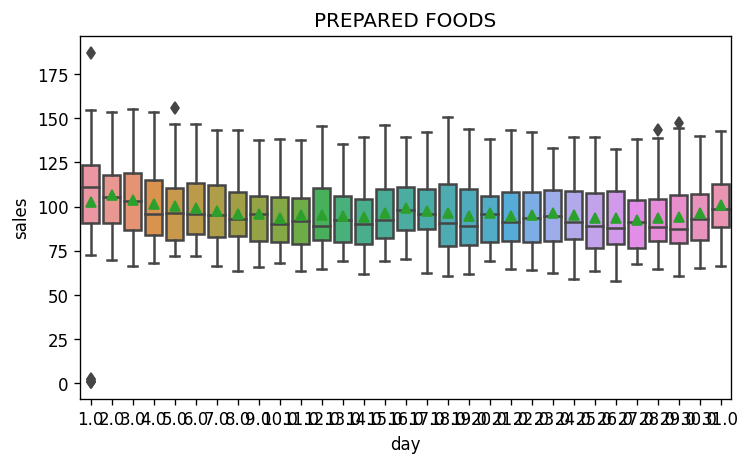

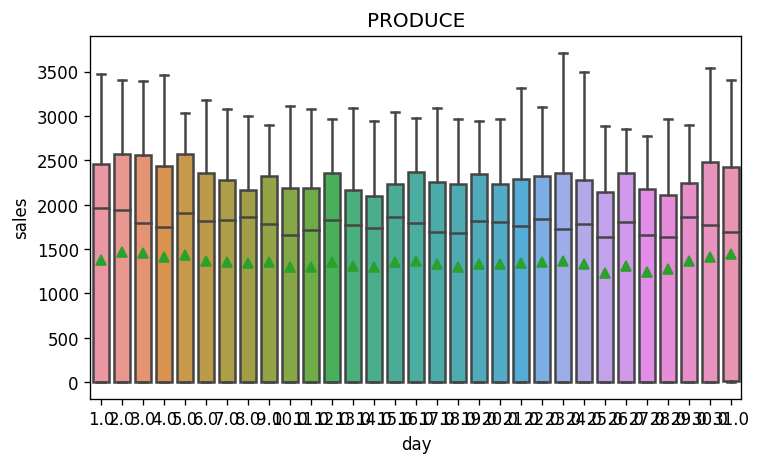

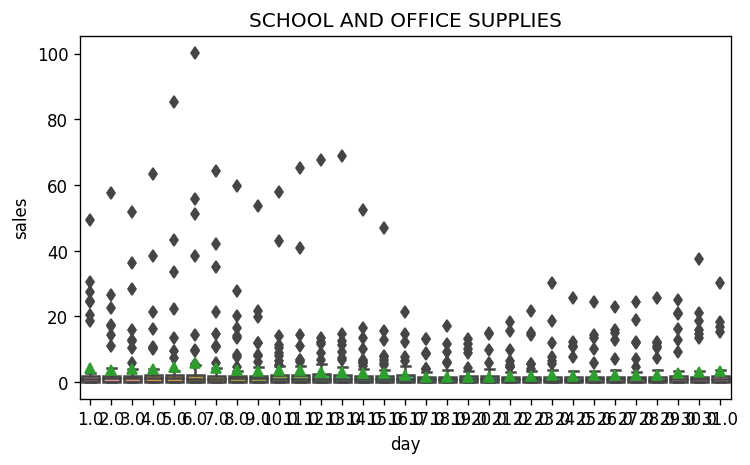

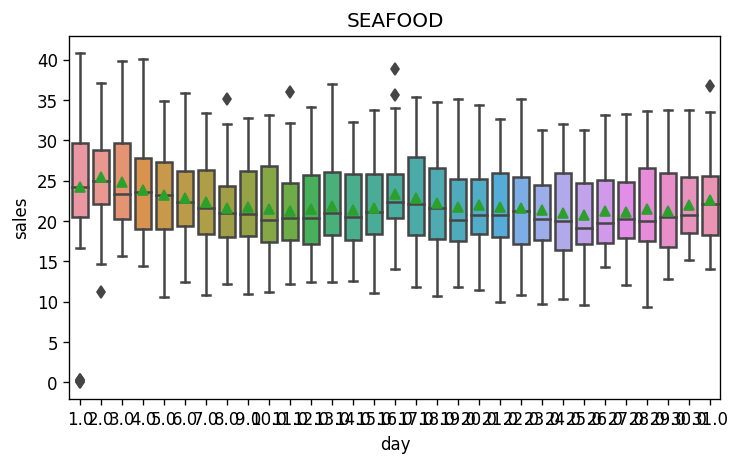

In [63]:
for family in df_train["family"].unique():
  data = df_train.query(" family==@family ")
  data["day"] = data.index.day
  data = data.groupby(["date"]).mean()
  plt.figure(figsize=(7, 4), dpi=120)
  sns.boxplot(data=data, x="day", y="sales", showmeans=True).set(title=family)
  plt.show()

曜日

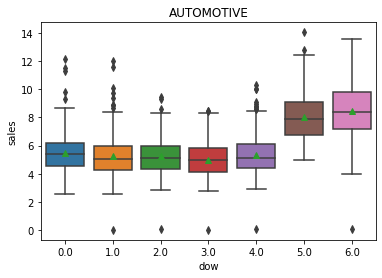

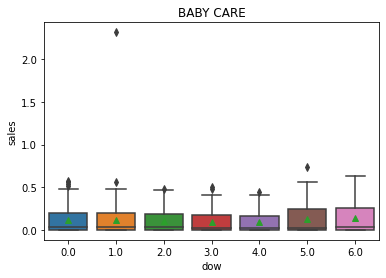

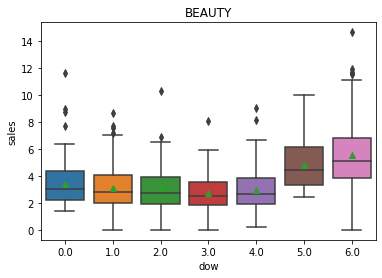

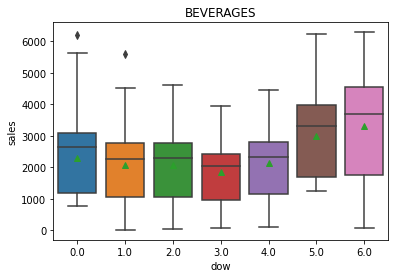

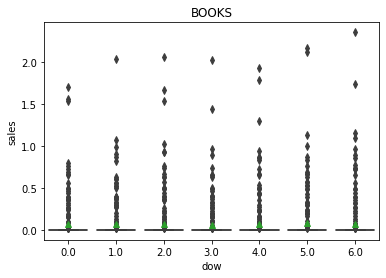

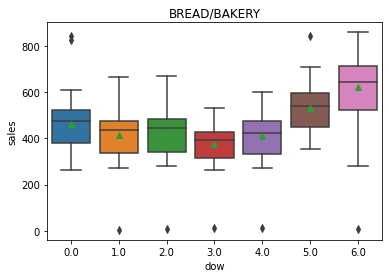

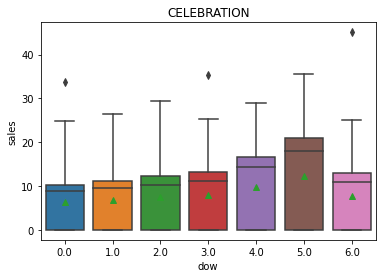

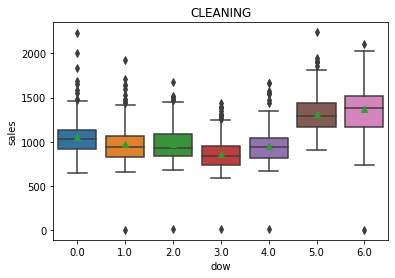

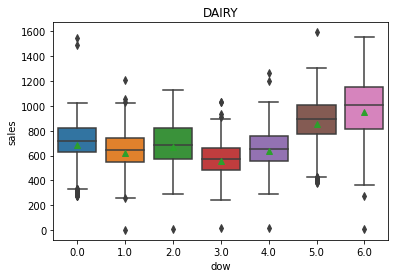

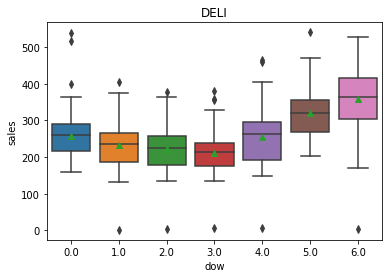

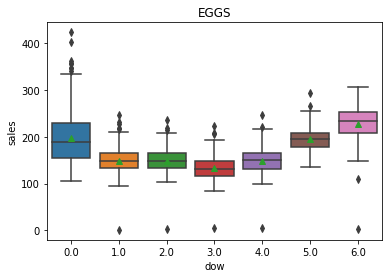

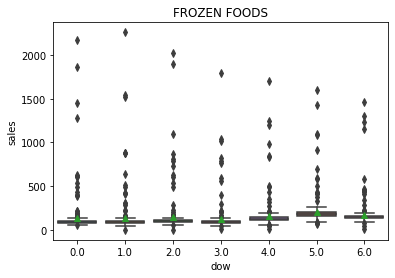

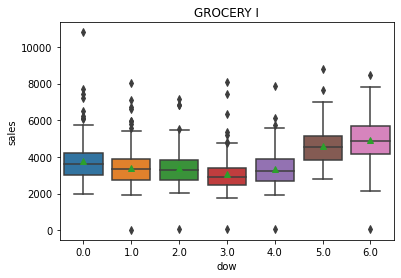

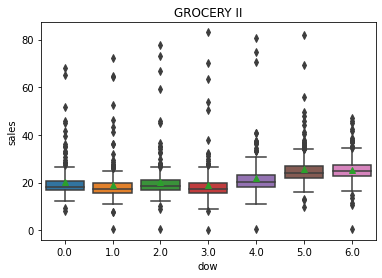

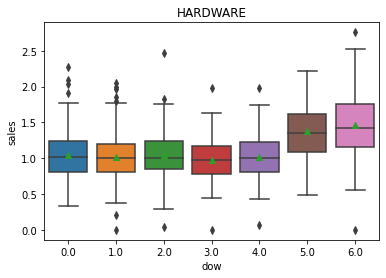

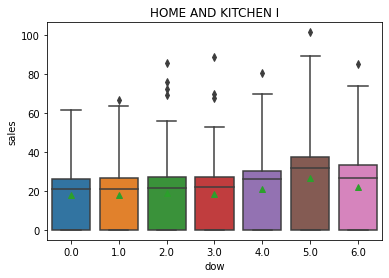

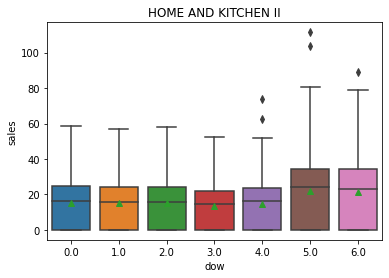

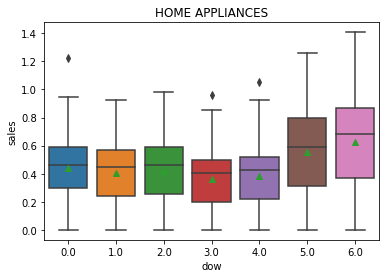

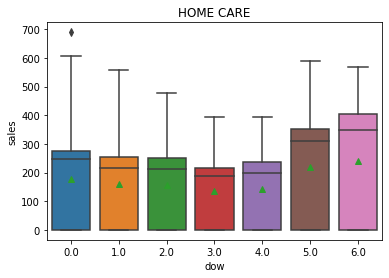

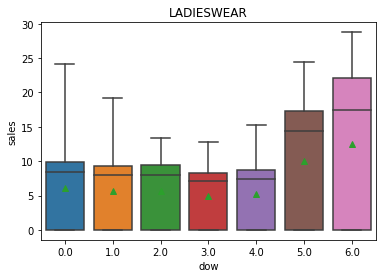

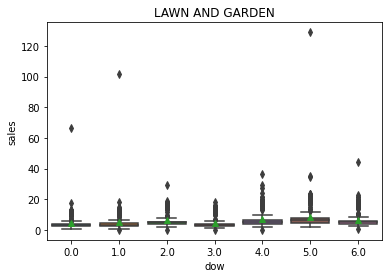

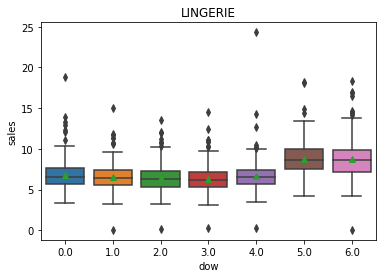

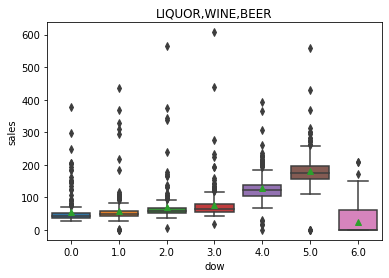

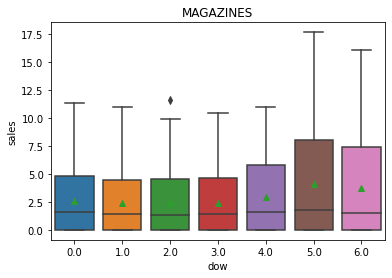

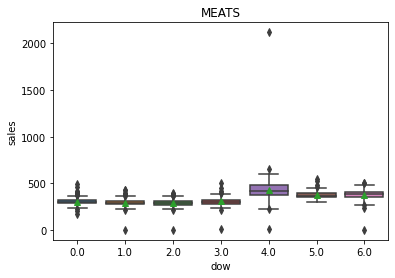

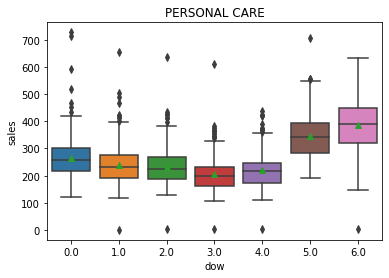

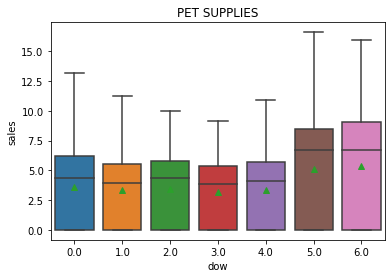

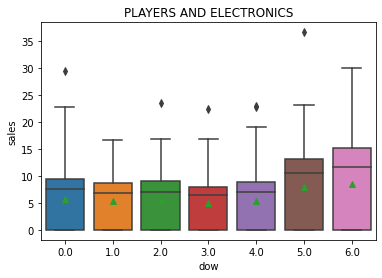

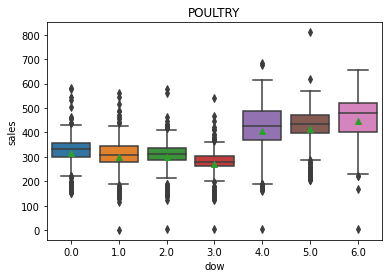

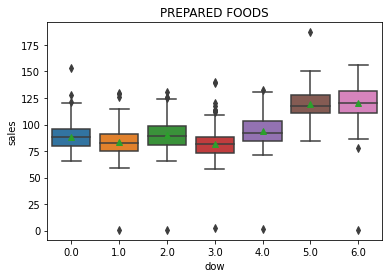

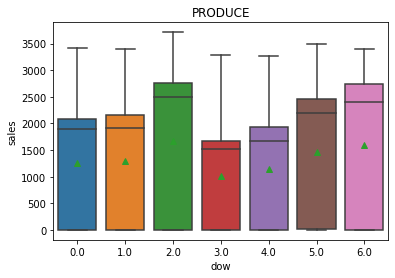

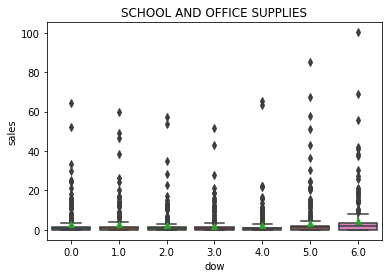

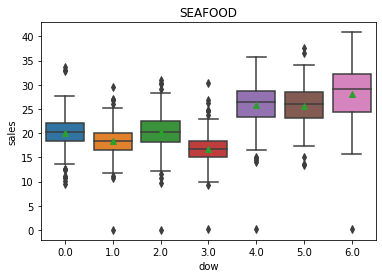

In [64]:
for family in df_train["family"].unique():
  data = df_train.query(" family==@family ")
  data["dow"] = data.index.dayofweek
  data = data.groupby(["date"]).mean()
  #plt.figure(figsize=(7, 4), dpi=120)
  sns.boxplot(data=data, x="dow", y="sales", showmeans=True).set(title=family)
  plt.show()

月

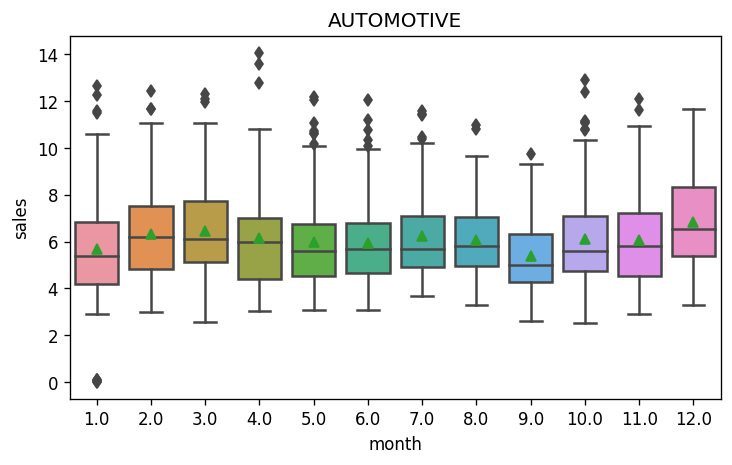

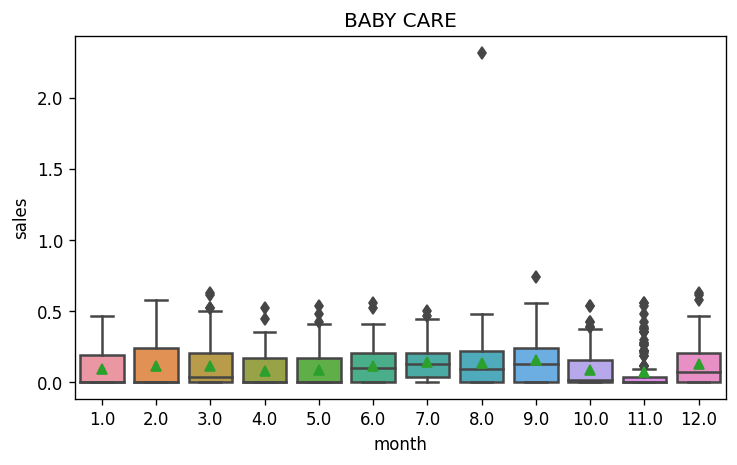

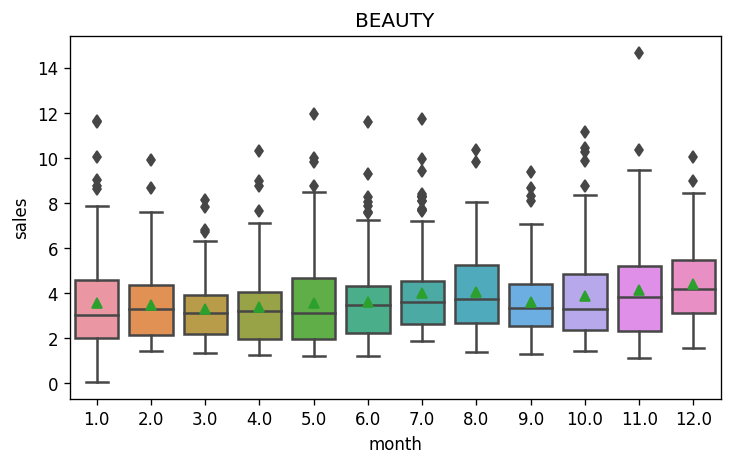

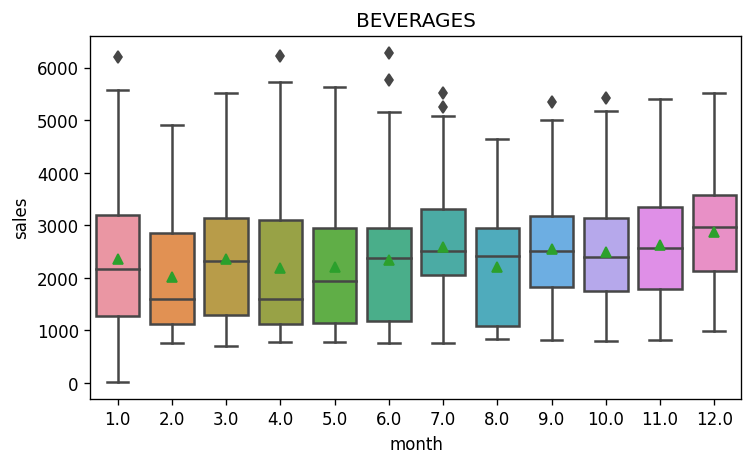

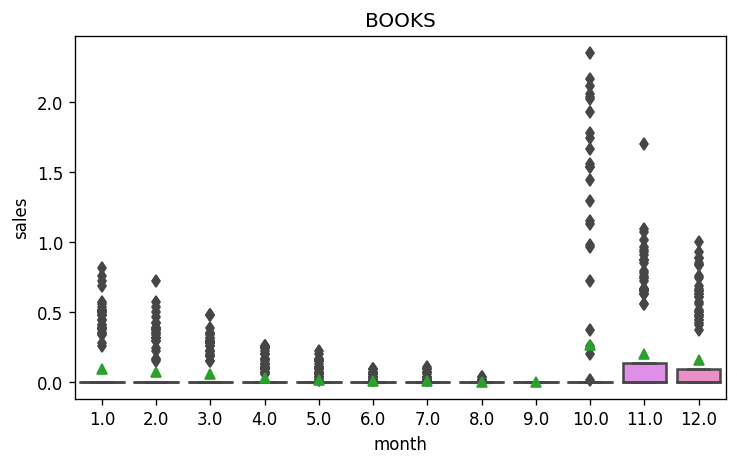

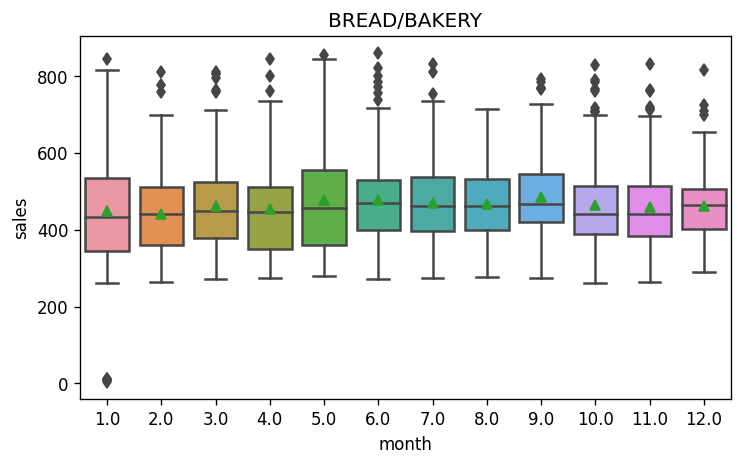

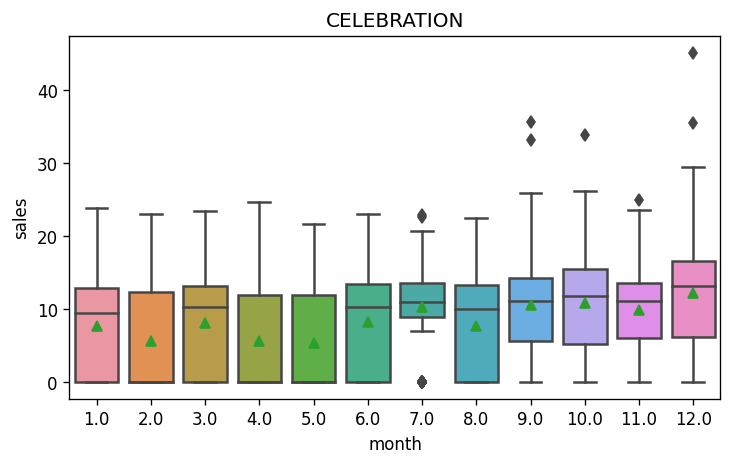

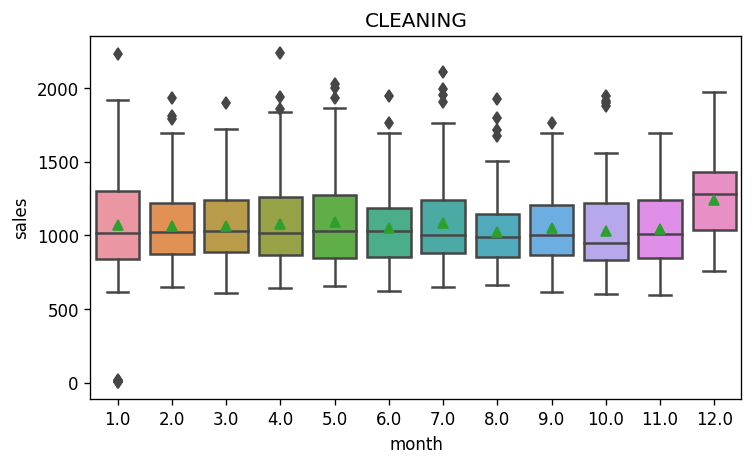

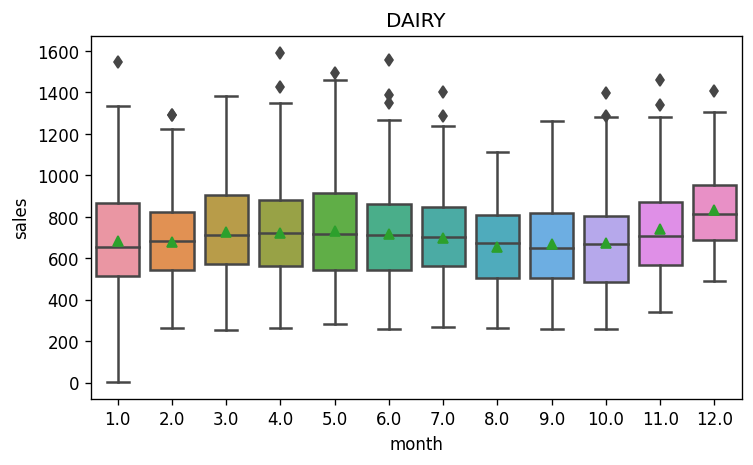

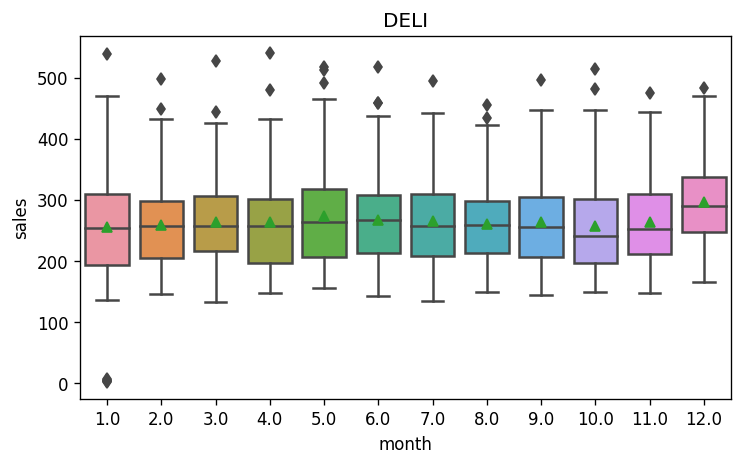

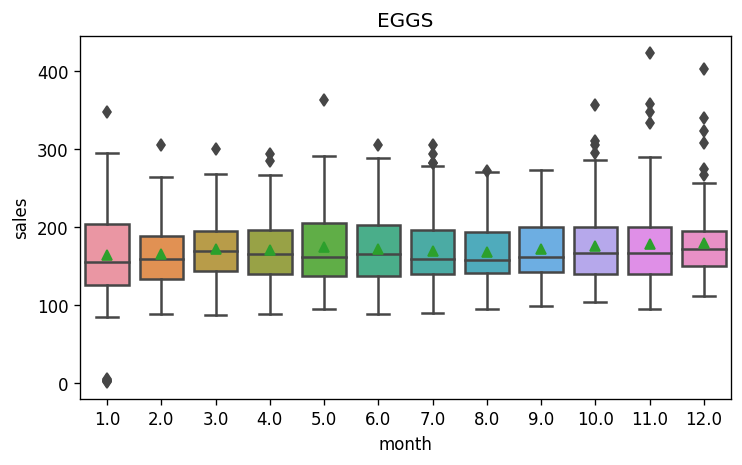

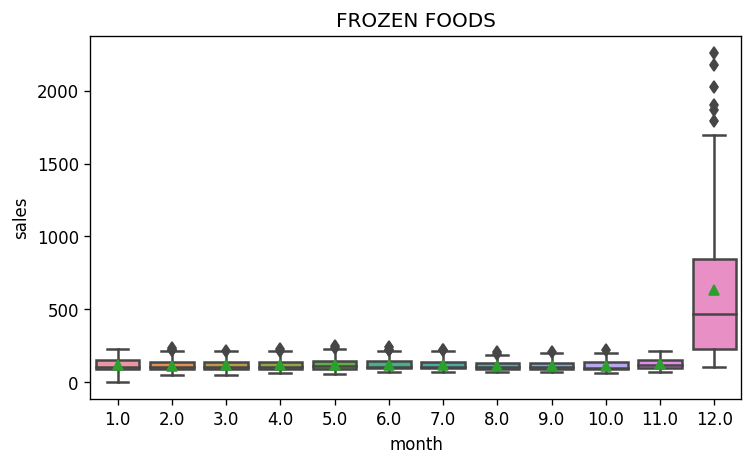

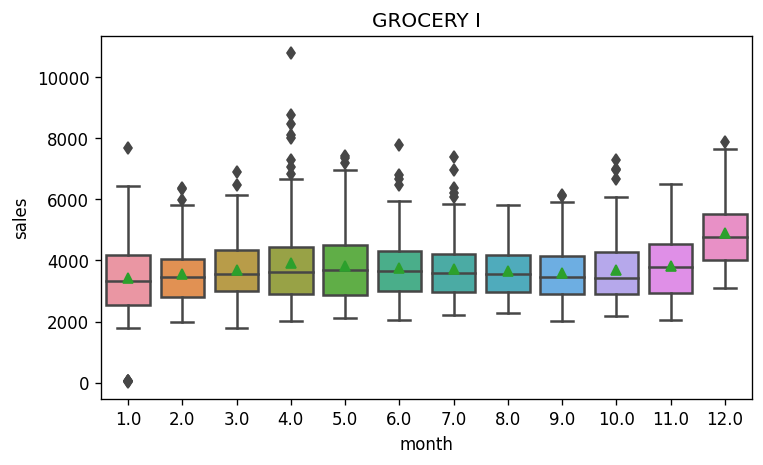

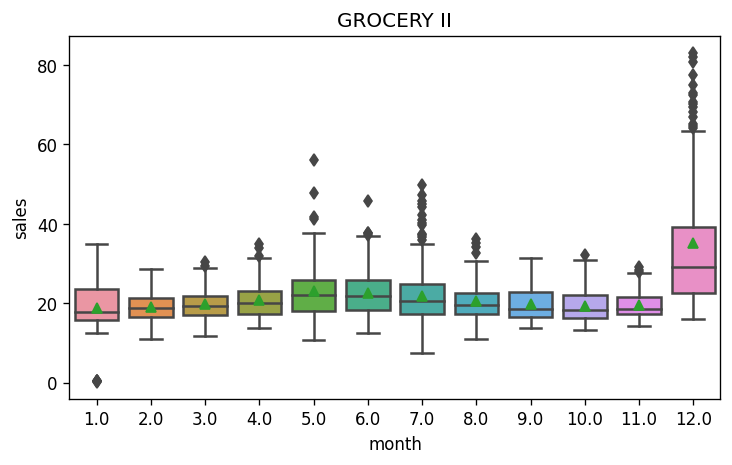

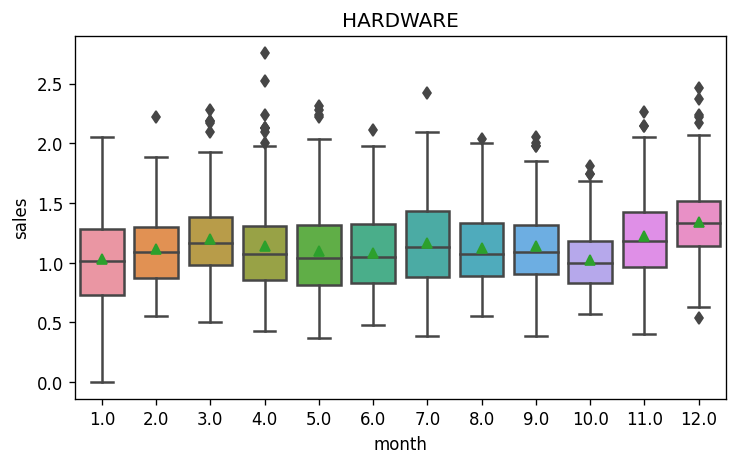

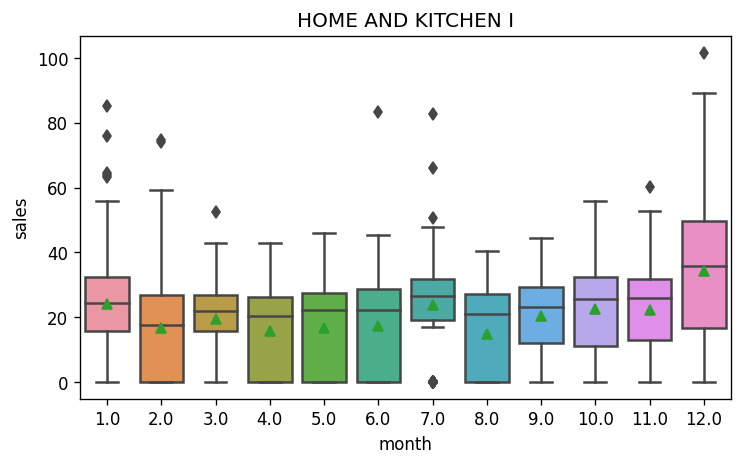

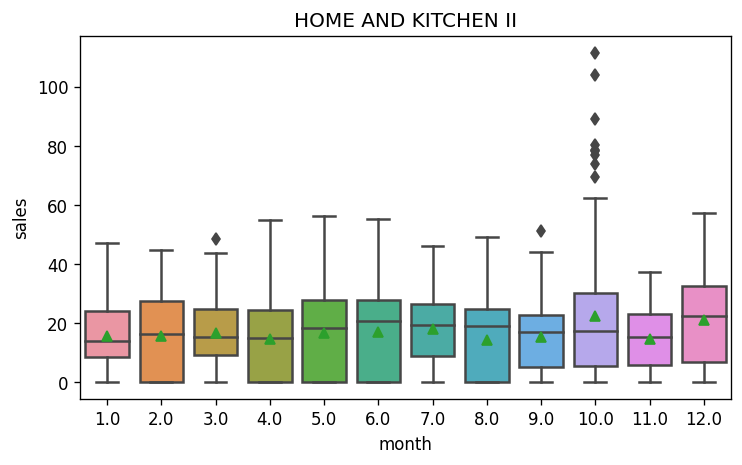

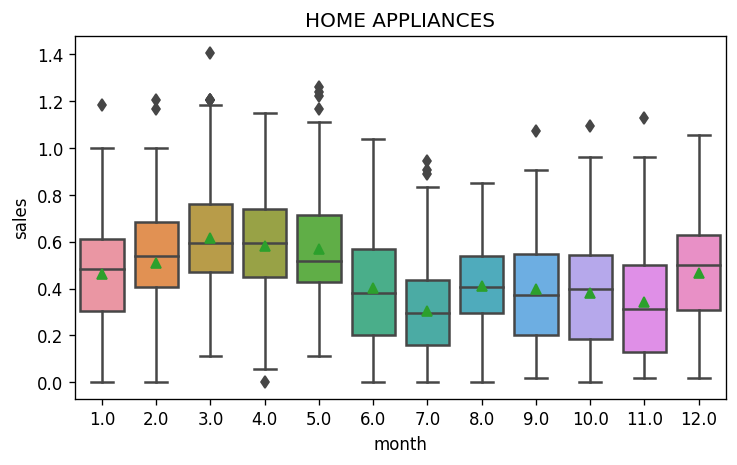

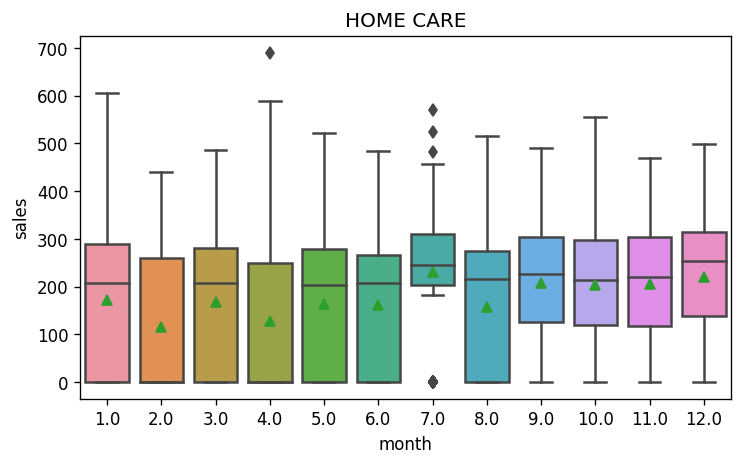

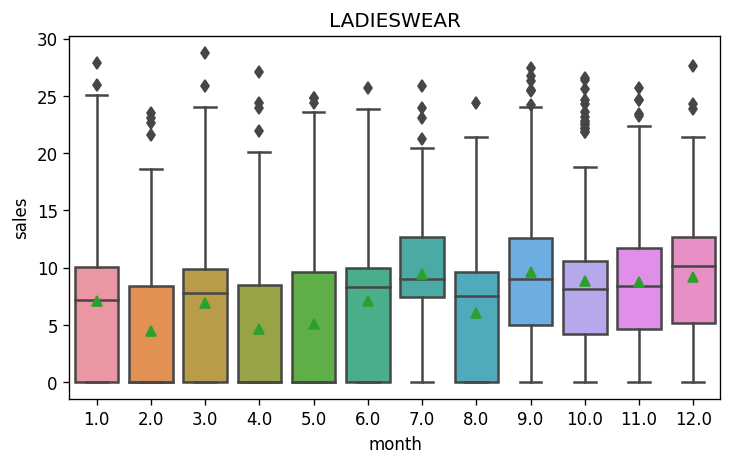

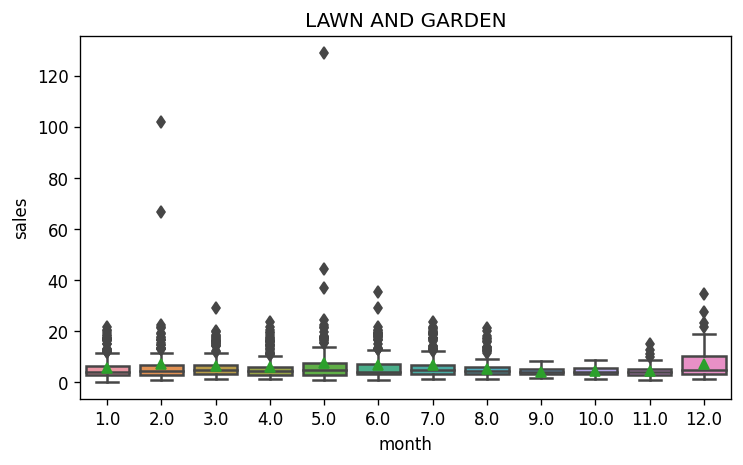

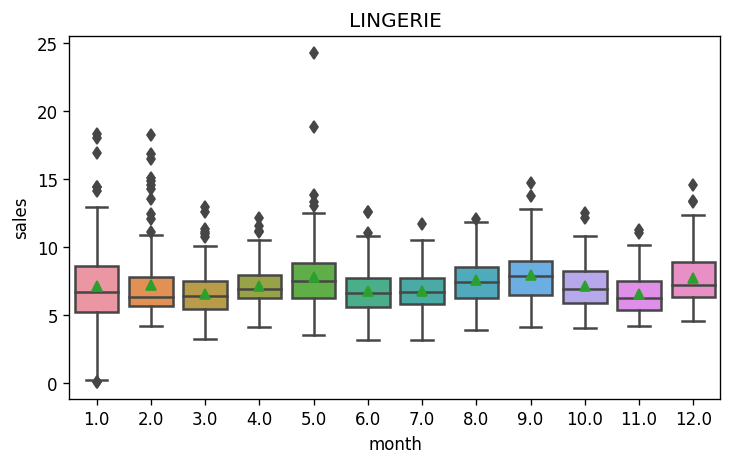

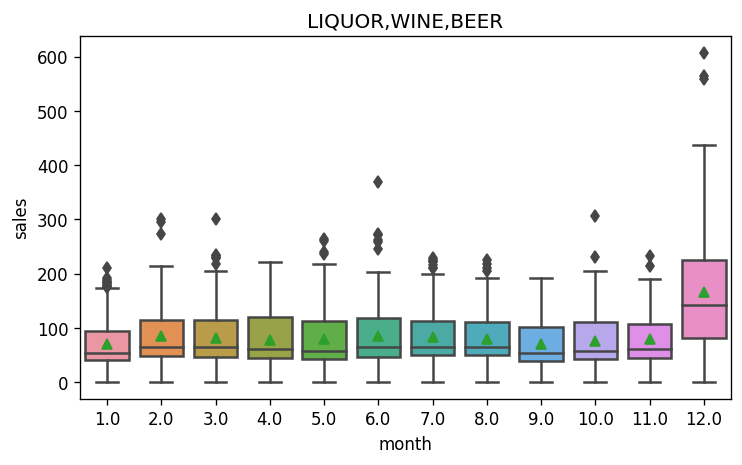

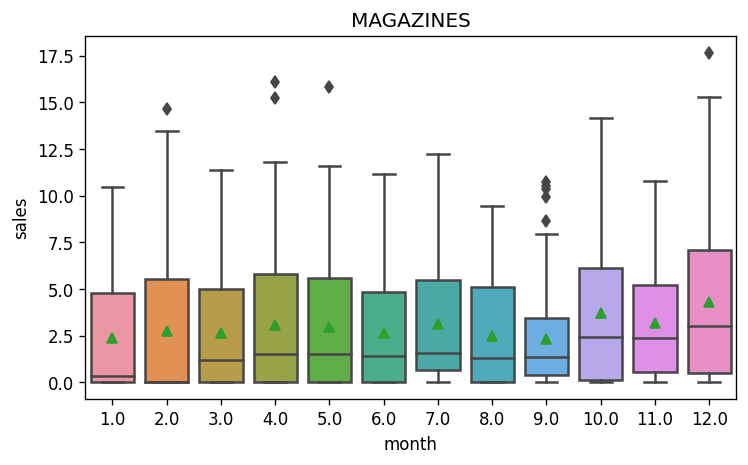

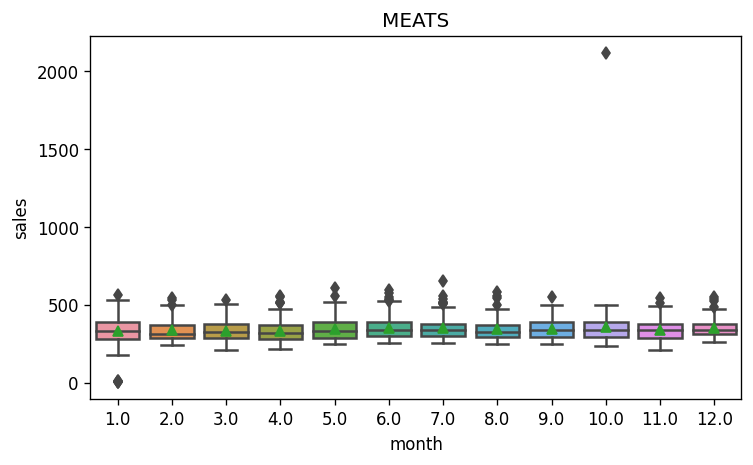

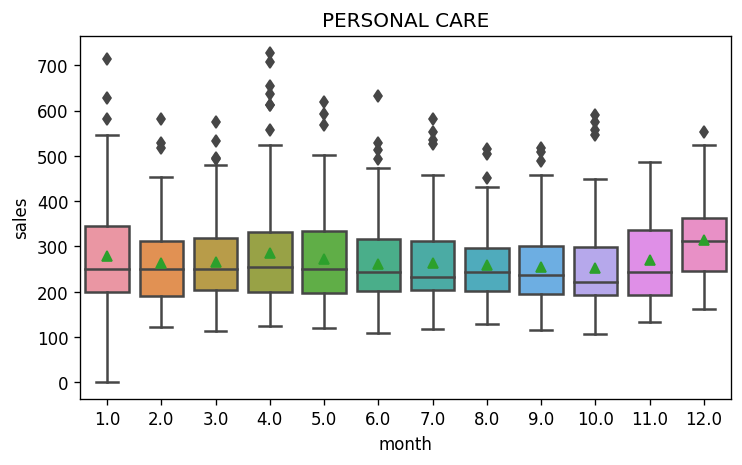

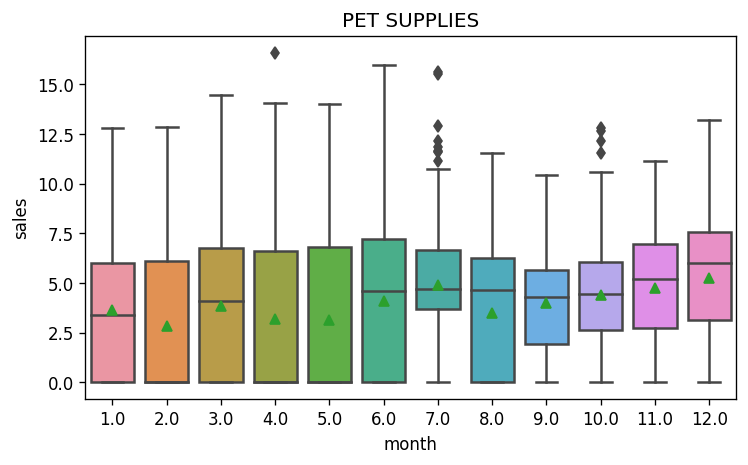

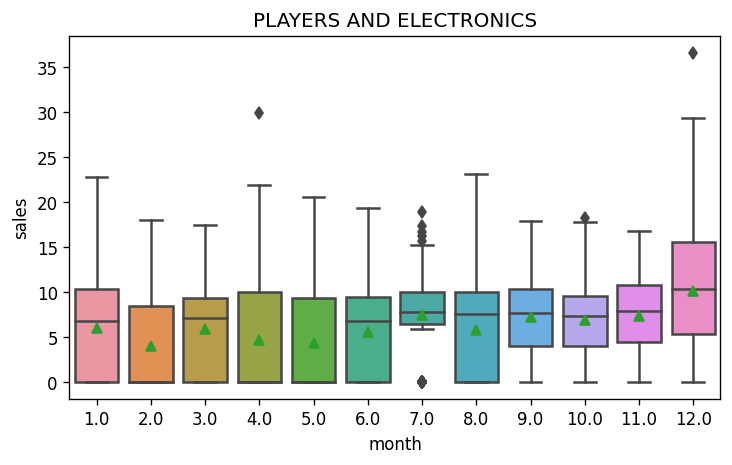

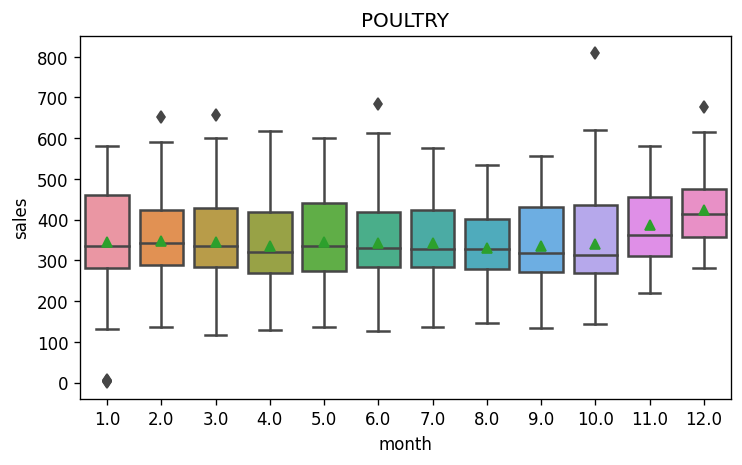

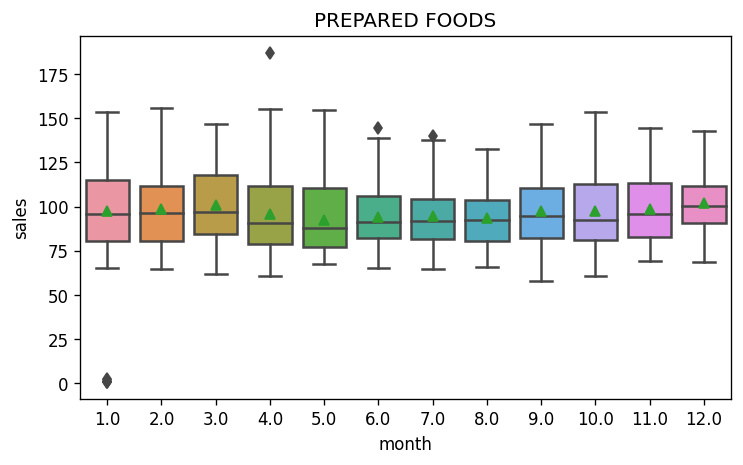

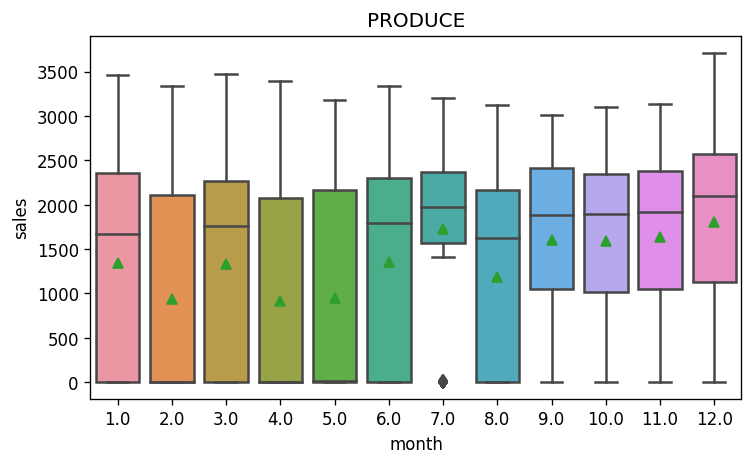

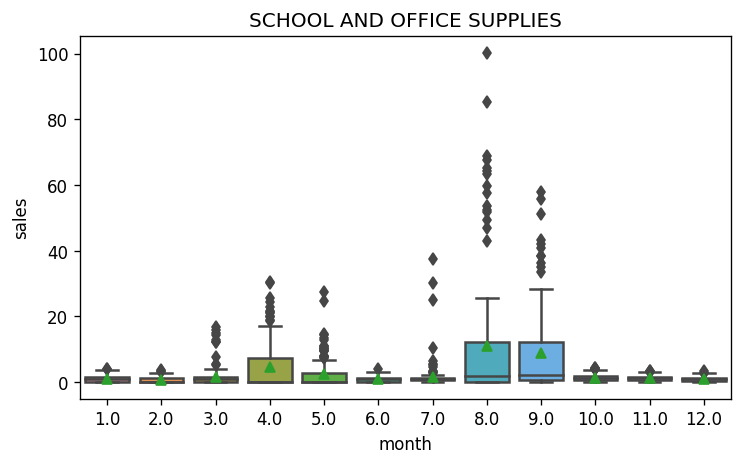

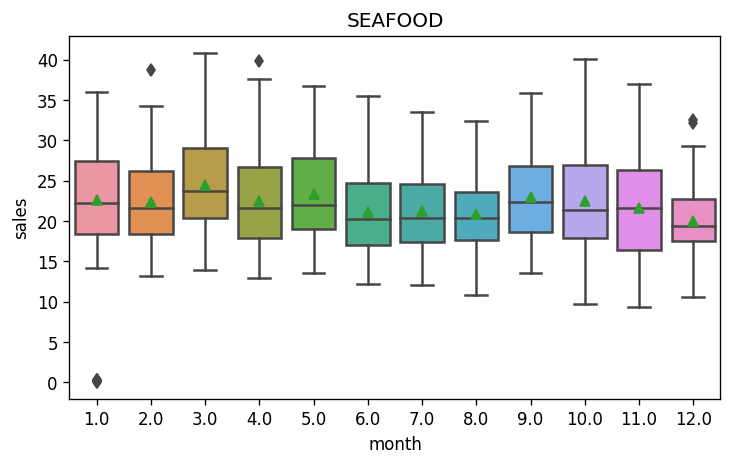

In [65]:
for family in df_train["family"].unique():
  data = df_train.query(" family==@family ")
  data["month"] = data.index.month
  data = data.groupby(["date"]).mean()
  plt.figure(figsize=(7, 4), dpi=120)
  sns.boxplot(data=data, x="month", y="sales", showmeans=True).set(title=family)
  plt.show()

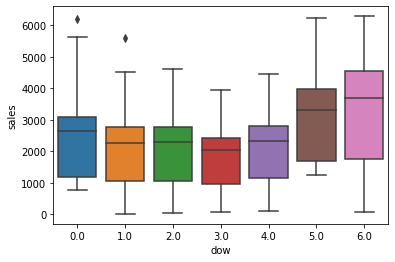

In [56]:
data = df_train.query(" family=='BEVERAGES' ")
data["dow"] = data.index.dayofweek
data = data.groupby(["date"]).mean()
sns.boxplot(data=data, x="dow", y="sales")

AUTOMOTIVE


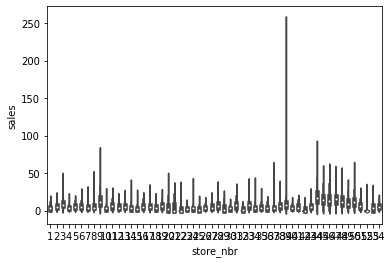

BABY CARE


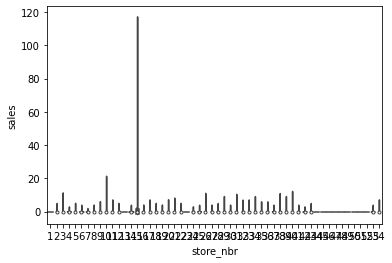

BEAUTY


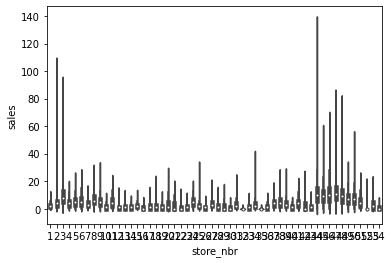

BEVERAGES


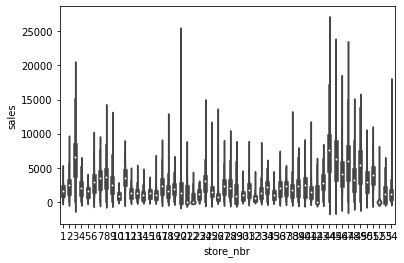

BOOKS


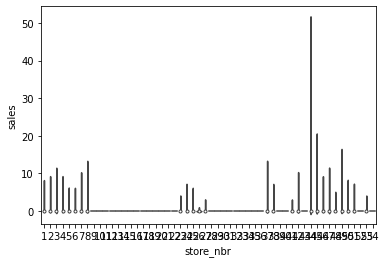

BREAD/BAKERY


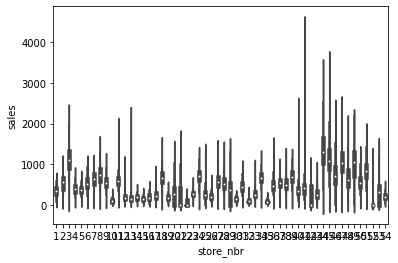

CELEBRATION


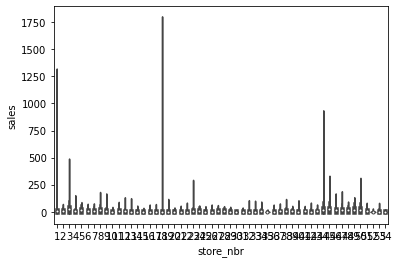

CLEANING


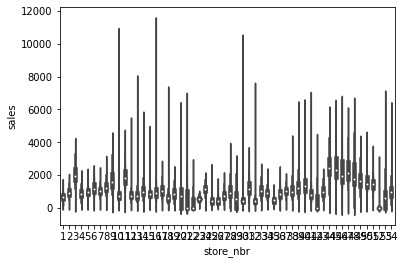

DAIRY


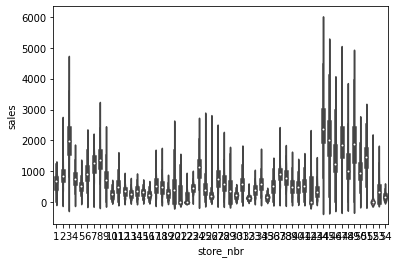

DELI


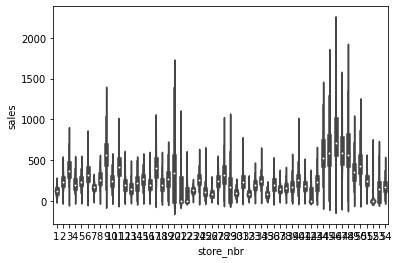

EGGS


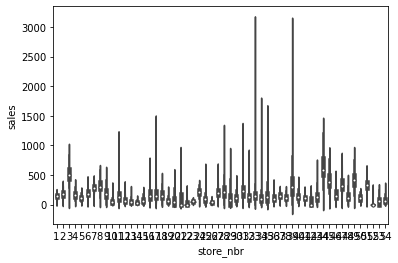

FROZEN FOODS


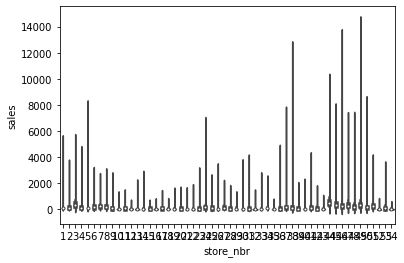

GROCERY I


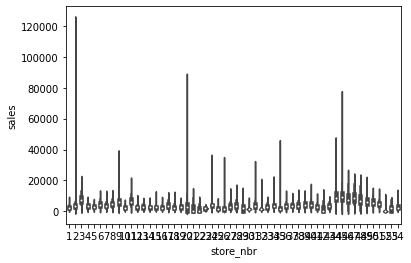

GROCERY II


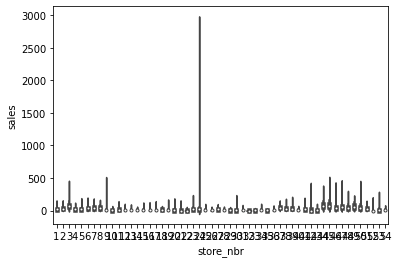

HARDWARE


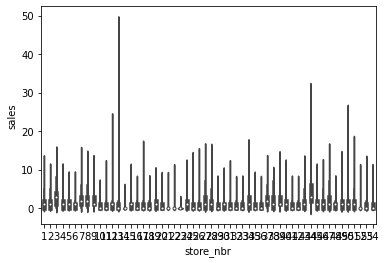

HOME AND KITCHEN I


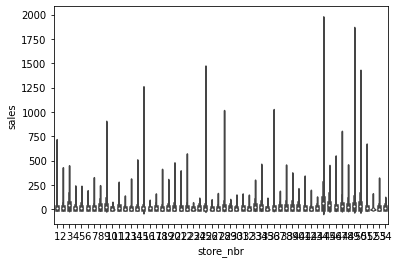

HOME AND KITCHEN II


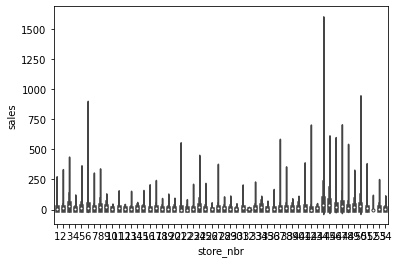

HOME APPLIANCES


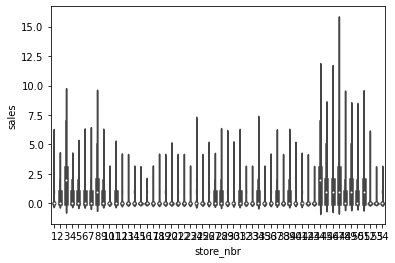

HOME CARE


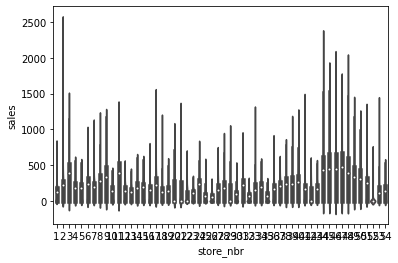

LADIESWEAR


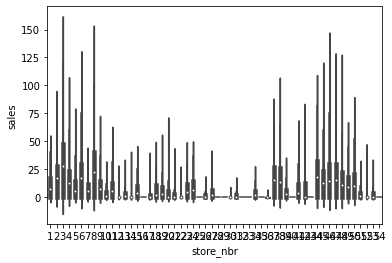

LAWN AND GARDEN


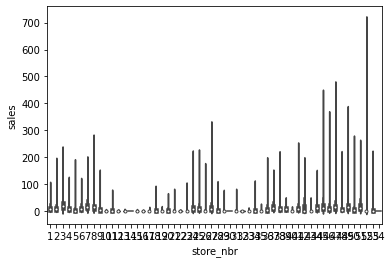

LINGERIE


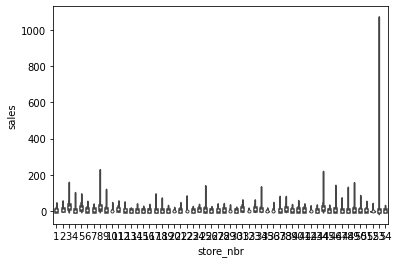

LIQUOR,WINE,BEER


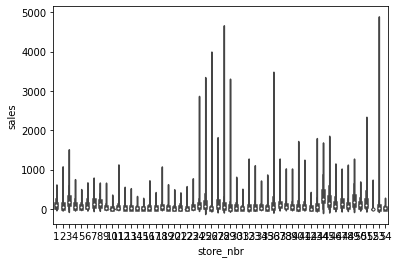

MAGAZINES


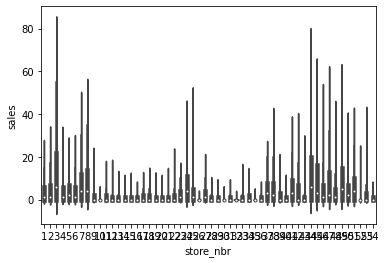

MEATS


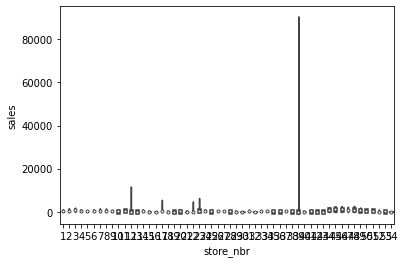

PERSONAL CARE


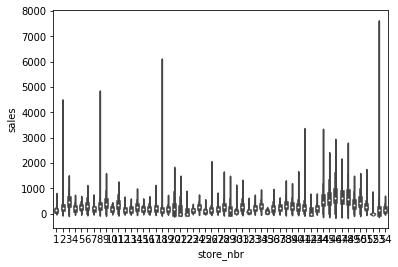

PET SUPPLIES


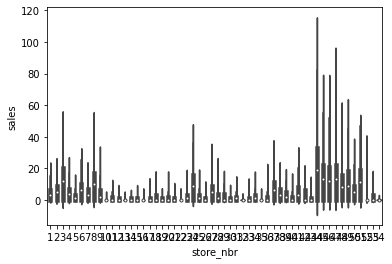

PLAYERS AND ELECTRONICS


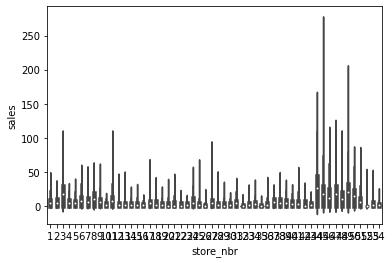

POULTRY


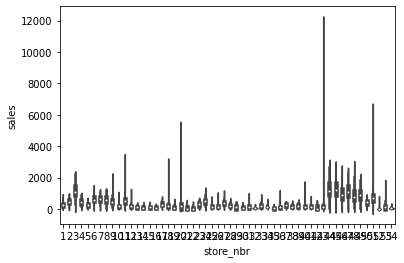

PREPARED FOODS


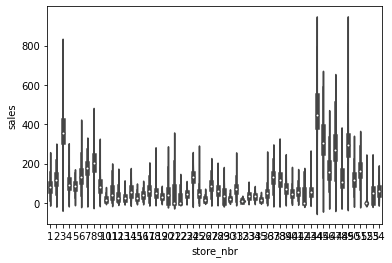

PRODUCE


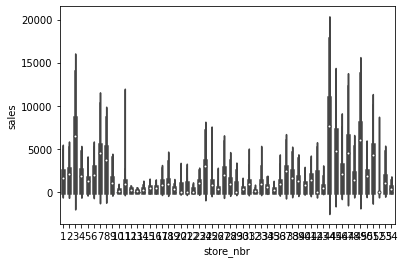

SCHOOL AND OFFICE SUPPLIES


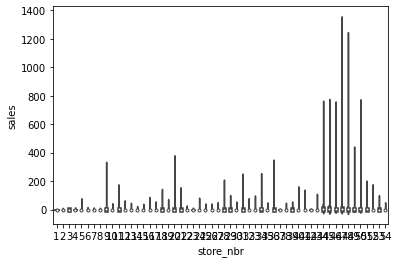

SEAFOOD


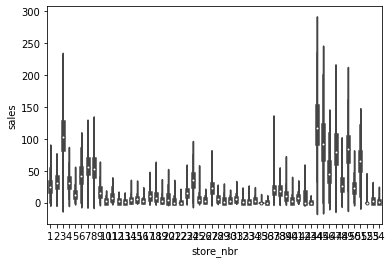

In [ ]:
import seaborn as sns

x = "store_nbr"
target = "sales"
for family in df_train["family"].unique():
  data = df_train.query(" family==@family ")
  sns.violinplot(data=data, y=target, x=x)
  print(family)
  plt.show()

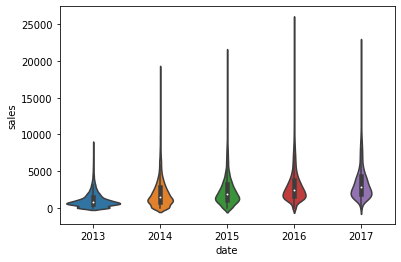

In [ ]:
data = df_train.query(" family==@family ")
x = data.index.year
target = "sales"
sns.violinplot(data=data, y=target, x=x)

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=180)
ax = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(df[target].to_numpy(), lags=50, ax=ax)
ax.set_xlabel("ラグ数")
ax.set_ylabel("偏自己相関")
ax.set_xlim(0, 50)
plt.show()
plt.close()